# Data Loading

## Data loading with Pandas

Loading boston_house_prices.csv

In [8]:
# subset of the 1993 US census
import pandas as pd

data = pd.read_csv("adult.csv") #, index_col=0)

In [9]:
data.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [10]:
data.columns=['age','workclass','unnamed','education','education-num',
            'marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']
data.drop('unnamed', inplace=True, axis=1)

data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48836,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48837,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48838,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48839,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48840,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
data.shape

(48841, 14)

## Simple analysis

In [14]:
data.shape

(48841, 14)

In [15]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [16]:
#counting number of unique values in income column
data.income.value_counts()

<=50K    37154
>50K     11687
Name: income, dtype: int64

In [17]:
D1=data.groupby("income").count()
#type(D1)
D1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,
<=50K,37154,37154,37154,37154,37154,37154,37154,37154,37154,37154,37154,37154,37154
>50K,11687,11687,11687,11687,11687,11687,11687,11687,11687,11687,11687,11687,11687


income
<=50K    AxesSubplot(0.125,0.125;0.775x0.755)
>50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

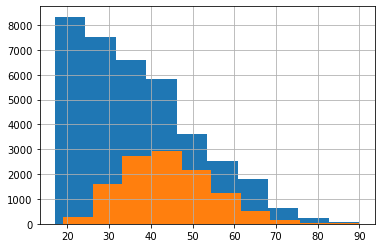

In [18]:
#%matplotlib inline
data.groupby("income").age.hist()

# Splitting into training and test data

In [10]:
X = data.drop("income", axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = data.income

In [11]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [12]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) #default is 25-75 split

In [14]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
11447,39,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States
17699,34,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,15,United-States
15360,48,Federal-gov,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States
7851,36,Local-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States
2367,34,Self-emp-inc,Masters,14,Separated,Prof-specialty,Not-in-family,White,Female,4787,0,40,United-States


In [15]:
X_train.shape

(24420, 13)

# Exercise I 
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
housedata = pd.read_csv("boston_house_prices.csv")
housedata

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
print("Number of observations/samples: {}, Number of Features: {}".format(housedata.shape[0],housedata.shape[1]))

Number of observations/samples: 506, Number of Features: 14


In [29]:
housedata.columns
print("boston_house_prices dataset columns are: {}" .format(housedata.columns))

boston_house_prices dataset columns are: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


<AxesSubplot:xlabel='rm', ylabel='medv'>

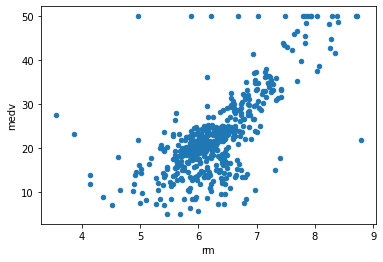

In [31]:
# Split the data into a training and a test set for learning.
X = housedata.drop("medv",axis=1) #axis=1 means we drop the column
y = housedata["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,y)
X.shape, X_train.shape, X_test.shape

# Scatterplot of medv related to rm (# of rooms) 
housedata.plot('rm','medv',kind='scatter')
# The graph shows a linear relation: with more rooms, the value of the house increases 

In [55]:
import matplotlib as plt

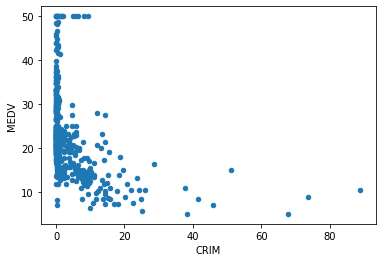

In [57]:
housedata.plot.scatter(x = "crim", y="medv",)

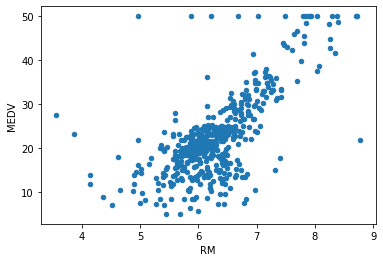

In [59]:
housedata.plot("rm","medv",kind="scatter")

## Load Datasets from ScikitLearn

Get some data to play with

In [34]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [35]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [63]:
type(digits)

sklearn.utils.Bunch

In [79]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [81]:
digits.data.shape

(1797, 64)

In [82]:
digits.target.shape

(1797,)

In [85]:
#64 features for each digit we have

In [86]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [87]:
np.bincount(digits.target)   #Cool Method

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [88]:
digits.data[0].shape

(64,)

In [89]:
digits.data[0].reshape(8, 8).shape

(8, 8)

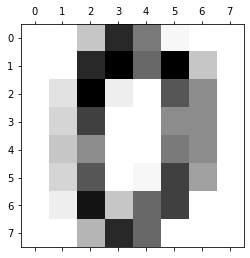

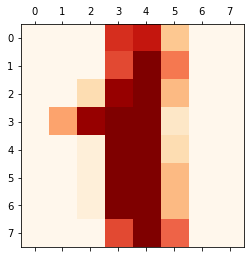

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook <- interactive interface
#plt.matshow: Display an array as a matrix in a new figure window.
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)  #Color Map Gray
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Blues)  #Color Map Blue
plt.imshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)
plt.imshow(digits.data[1].reshape(8,8), cmap=plt.cm.OrRd)

In [100]:
digits.target[0]

0

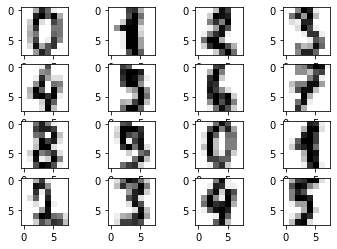

In [6]:
'''
plt.subplots() is a function that returns a tuple containing a
figure and axes object(s). Thus when using fig, ax = plt.subplots()
you unpack this tuple into the variables fig and ax. Having fig is
useful if you want to change figure-level attributes or save the
figure as an image file later (e.g. with fig.savefig('yourfilename.png')).
'''

fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    #ax.set_title(y) #Set a title for the axes.
    ax.imshow(x.reshape(8, 8), cmap="gray_r") #Display an image, i.e. data on a 2D regular raster.
    #ax.set_xticks(())#Set the xaxis' tick locations.
    #ax.set_yticks(())
#plt.tight_layout()

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.25, random_state=1)

In [8]:
digits.data.shape

(1797, 64)

In [9]:
X_train.shape

(1347, 64)

In [10]:
X_test.shape

(450, 64)

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.


In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [41]:
X,y = iris.data, iris.target

In [42]:
# iris.shape # throws an error
X.shape #numpy array

(150, 4)

In [43]:
y.shape

(150,)

In [44]:
y[:10] # 10 primeros valores en y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
np.bincount(y) # nro de elementos en y según cada valor de y

array([50, 50, 50])

In [48]:
np.unique(y) # valores únicos de y

array([0, 1, 2])

In [ ]:
#Print

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y) 
# train test split with stratify based on y to have equal representation 
# of each target variable in each dataset

In [51]:
import matplotlib.pyplot as plt

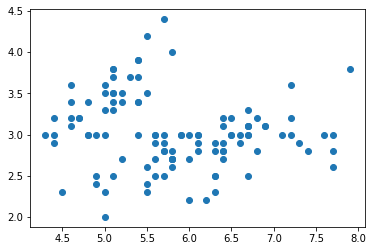

In [55]:
# Scatterplot with 2 of the 4 features in X_train
plt.scatter(x = X_train[:,0], y = X_train[:,1])

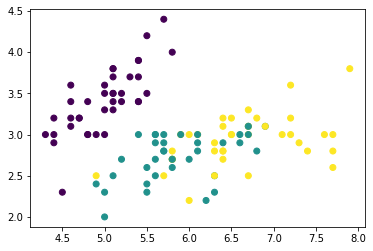

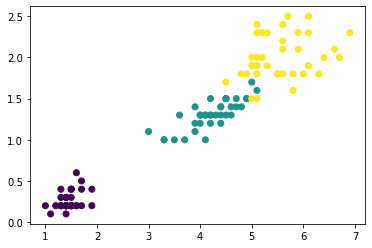

In [58]:
# Add c variable to plt.scatter function to see which dots belong to y's
# different values: 0, 1, 2
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)
plt.figure()
plt.scatter(x = X_train[:,2], y = X_train[:,3], c = y_train)

From the 1st scatterplot above: using only the first 2 features of X serves to
classify one cluster (the purple one).
The 2ns scatterplot shows a better separation of clusters. Maybe we can only use feautures 2 and 3 of X to predict y. We'll see.

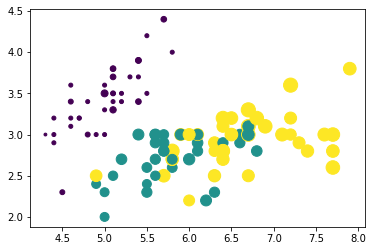

In [60]:
plt.scatter(x = X_train[:,0],y = X_train[:,1], s= 80 * X_train[:,3] ,c=y_train)
# We can add alpha = 0.2 to add transparency and distinguish some overlaps 
# Adding Third feature with size 80 times. With this we see the group in yellow 
# has higher values for X's 4th feature 